# Esame Laboratorio di Programmazione II - 22/07/2025


Scrivete chiaramente sul notebook il vostro nome e matricola e rinominate il file che consegnate come `matricola.ipynb` (la matricola è SMnumeri o ECnumeri).

Per ogni funzione e metodo che richiede un campionamento rispetto ad una distribuzione settate il seed a 0: ``np.random.seed(0)``.

Stampate il risultato delle domande e consegnate il compito eseguito, quindi per cui ogni cella ha il corrispondente output.
Quindi ad esempio

e.g., 
NON scrivete: 
```python 
    lista=np.array([1,2,3])
```
ma 
```python
    lista=np.array([1,2,3]) 
    print('lista =', lista)   
```
Attenzione!Se scrivete:
```python
    lista=np.array([1,2,3])
    lista
```
``lista`` sarà l'unico ouput che si vede di quella cella

NB: Potete usare anche più di una cella python per domanda e se l'output è una matrice molto grande non dovete stamparla.

Sarà valutata anche la presentazione, ad esempio un plot senza etichette sugli assi o illeggibili sarà valutato meno bene di uno con etichette chiare.

Cercate di commmentare il compito di modo che si capisca cosa avete fatto.

Controllate attentamente di avere consegnato il file giusto.

## Esercizio 1

Crea un vettore NumPy con le seguenti spese annuali per l’auto (in euro) sostenute da 7 persone:
3200, 2750, 4100, 3600, 2950, 5100, 4400

1. Calcola la spesa totale complessiva sostenuta dal gruppo.

2. Le persone con spese minori di 3000 € ottengono una detrazione fiscale del 15%. Applica la modifica al vettore.

3. Quanto ha risparmiato il gruppo dopo la detrazione fiscale?


In [ ]:
#vettore NumPy 
import numpy as np

auto = np.array([3200, 2750, 4100, 3600, 2950, 5100, 4400], dtype=float)

#1
spesa_totale = auto.sum()
print("La spesa totale complessiva è:", spesa_totale)

#2
auto_copy = auto.copy()
auto_copy[ auto < 3000 ] *= 0.85 #non posso usare *= in un'assegnazione
print("Il vettore dopo la detrazione è:", auto_copy)

#3
#calcolo la spesa totale dopo la detrazione
spesa_finale = auto_copy.sum()
risparmio = spesa_totale - spesa_finale
print("Il gruppo dopo la detrazione ha risparmiato euro: ", risparmio)

#10 minuti

La spesa totale complessiva è: 26100.0
Il vettore dopo la detrazione è: [3200.  2337.5 4100.  3600.  2507.5 5100.  4400. ]
Il gruppo dopo la detrazione ha risparmiato euro:  855.0


## Esercizio 2
1. Scrivi una funzione che simula il lancio di un dado per N volte e restituisce un array con il numero di volte che è uscita ciascuna faccia (da 1 a 6).
2. Calcolare la frequenza % con la dimensione del campione (numero di lanci) 100 volte da 10 a 5000.  Ottieni così 100 array di frequenze.
3. Fai il plot dell’andamento della frequenza media delle facce 1, 3 e 6 in funzione della dimensione del campione.



In [ ]:
def lancio_dado (N):
    #creo array che salva le facce uscite per ogni lancio
    facce = np.random.choice(range(1, 7) , size=N) #probabilità uniforme(1/6)

    #creo un array di zeri con 6 caselle in cui salvero le occorrenze
    conteggi = np.zeros(6, dtype=int)
    
    for numero in range(1, 7):
        conteggi[numero-1] = np.sum(facce == numero) #cicla in automatico tutto l'array facce
                                                    #array di True/False dove il valore è uguale a numero
  
    return conteggi

array = lancio_dado(10)
array

array([1, 1, 1, 1, 3, 3])

[20.  0. 10. 10. 20. 40.]
[13.33333333 21.66666667  8.33333333 23.33333333 18.33333333 15.        ]
[18.18181818 15.45454545 20.90909091 11.81818182 20.         13.63636364]
[18.63354037 14.9068323  22.36024845 20.49689441 11.80124224 11.80124224]
[17.06161137 18.00947867 12.32227488 18.48341232 14.69194313 19.43127962]
[14.88549618 16.41221374 17.9389313  17.55725191 17.17557252 16.03053435]
[14.42307692 17.30769231 16.02564103 18.58974359 16.98717949 16.66666667]
[12.70718232 14.64088398 15.19337017 21.54696133 16.29834254 19.61325967]
[17.19128329 17.91767554 17.43341404 15.01210654 17.19128329 15.25423729]
[16.41468683 16.63066955 15.33477322 15.98272138 17.06263499 18.57451404]
[18.28793774 15.75875486 14.59143969 18.6770428  15.95330739 16.73151751]
[17.37588652 18.97163121 15.24822695 15.42553191 16.66666667 16.31205674]
[15.30944625 17.4267101  15.63517915 17.752443   15.96091205 17.91530945]
[18.19548872 18.4962406  13.68421053 13.83458647 17.29323308 18.4962406 ]
[16.92307692

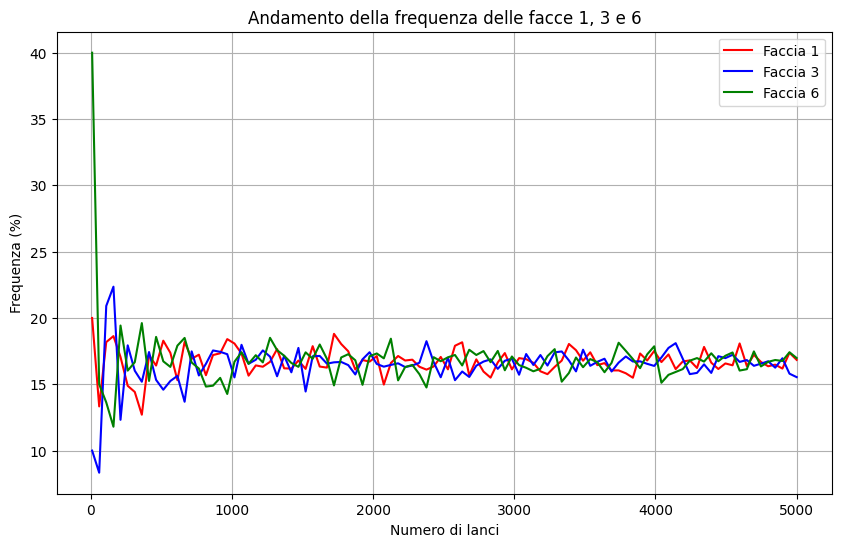

In [49]:
campione = np.linspace(10, 5000, 100, dtype=int) #da 10 a 5000 prende 100 valori equidistanti

#creo liste per salvare le frequenze delle varie facce
freq1 = []
freq3 = []
freq6 = []

for N in campione:
    conteggi = lancio_dado(N) 
    frequenza = conteggi / N * 100
    freq1.append(frequenza[0])
    freq3.append(frequenza[2])
    freq6.append(frequenza[5])
    print(frequenza)

#Fai il plot dell’andamento della frequenza media delle facce 1, 3 e 6 in funzione della dimensione del campione.
plt.figure(figsize=(10, 6))
plt.plot(campione, freq1, label="Faccia 1", color="red")
plt.plot(campione, freq3, label="Faccia 3", color="blue")
plt.plot(campione, freq6, label="Faccia 6", color="green")
plt.title("Andamento della frequenza delle facce 1, 3 e 6")
plt.xlabel("Numero di lanci")
plt.ylabel("Frequenza (%)")
plt.legend()
plt.grid(True)
plt.show()

## Esercizio 3

1. Genera una matrice NumPy di dimensioni 7 x 7, con valori estratti da una distribuzione normale con media = 0, ed std = 5.

2. Per ogni riga, identifica il valore più lontano da zero (cioè con valore assoluto massimo). Crea un array con questi 7 valori (uno per riga).

3. Calcola quante di queste righe hanno il valore più lontano da zero positivo?

## Esercizio 4 

Utilizza il dataset cereal.csv.

Contiene dati nutrizionali (proteine, fibre, calorie, zuccheri, ecc.) per circa 70 cereali.


1.  Aggiungi una colonna chiamata `nutri_score`, definita come:
$$
\texttt{nutri\_score} = \frac{\texttt{protein} + \texttt{fiber}}{\texttt{calories}}
$$

Indica quanti nutrienti positivi ci sono per ogni caloria: più è alto, più il cereale è "nutriente a parità di energia.

2. Trova i **5 cereali con il `nutri_score` più alto** e stampali con `name` e `nutri_score`.

3. Filtra i cereali che soddisfano entrambi i criteri:

   - meno di 120 calorie  
   - più di 2 grammi di fibra 


4. **Crea un grafico a barre** dei **10 cereali con il `nutri_score` più alto**, usando `name` sull’asse x.

5. Crea uno **scatter plot** (grafico a punti) che visualizzi:

   - `calories` sull’asse x  
   - `nutri_score` sull’asse y
   - `protein` nel colore dei punti


## Esercizio 5 

Utilizza il dataset `imdb_top_1000.csv`, che contiene informazioni su 1000 film recensiti su IMDB.

1. Quanti **valori mancanti** ci sono per colonna? Elimina le righe con i valori mancanti.

2. Elimina la colonna `Overview`. Aggiungi una colonna (`main_genre`) con solo il primo genere della colonna `genre`. Quali sono i 5 generi più frequenti?

3. Che attore/attrice è stato/a più volte la `Star1` e quello/a che ha fatto più film.

4. Calcola l'IMDB_rating medio e il Gross medio di ogni genere. Fai uno scatter plot dell'IMDB_rating medio e il Gross medio di ogni genere. Riesci a mettere anche l'ettichetta del genere?

5. Visualizza la distribuzione del IMDB_rating  e la distribuzione del `Gross` dei primi 5 main_genre. (Hint fai due violin plot).




## Esercizio 6

Considera i seguenti dati, che :

`x = np.linspace(0, 10, 100)`  
`y = -3.5 * x + 2 + np.random.normal(0, 10, 100)`

Cerca di riprodurre la retta fittando i parametri della funzione y = ax + b.

1. Stima i parametri della retta.
2. Calcola l’intervallo di confidenza al 95% dei parametri a e b.
N.B il secondo output del metodo curve_fit è proprio la matrice di covarianza: `params, cov = curve_fit(retta, x, y)`. 
L'**errore standard** di ciascun parametro si calcola come:

$$
\text{errore\_standard}_i = \sqrt{\text{cov}(i, i)}
$$

dove $\text{cov}(i, i)$ è l'elemento diagonale $i$-esimo della **matrice di covarianza**.

L’**intervallo di confidenza al 95%** si approssima con:

$$
\text{parametro}_i \pm 1.96 \times \text{errore\_standard}_i
$$
3. Plotta i punti originali e la retta ottenuta con anche l'intervallo di confidenza